# Oil Production Forecasting 

This presents an analysis of oil production data using ARIMA (AutoRegressive Integrated Moving Average) modeling for forecasting. We will forecast the production volume for both years and months to provide insights into future production trends.
<div style="position:relative;">
  <img src="image4.jpg" style="width:400px; opacity:0.8;">
</div>

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import warnings

In [2]:
# Ignore warnings to improve code readability
warnings.filterwarnings("ignore")

## Loading the Data

In [3]:
df = pd.read_csv('oil_well_data.csv')

In [4]:
# Displaying the column names
df.columns

Index(['Well ID', 'Production Date', 'Production Volume (BBL/day)',
       'Operating Costs (USD/day)', 'Well Location', 'Weight of Crude Oil',
       'API Gravity', 'Well Depth (Feet)', 'Well Type', 'Well Pressure (PSI)'],
      dtype='object')

In [5]:
# first few rows of the data
df.head()

,Well ID,Production Date,Production Volume (BBL/day),Operating Costs (USD/day),Well Location,Weight of Crude Oil,API Gravity,Well Depth (Feet),Well Type,Well Pressure (PSI)
0,Well_1,2022-03-04,155.764515,2339.202397,Abqaiq,Heavy,15.925342,891.224747,Offshore,2734.675561
1,Well_1,2019-09-25,80.193546,799.279541,Abqaiq,Heavy,11.590701,3655.962381,Onshore,2655.913924
2,Well_1,2019-09-15,259.418591,3895.707155,Abqaiq,Medium,28.640735,1750.421038,Offshore,4428.291370
3,Well_1,2017-05-31,959.352419,14392.592910,Abqaiq,Medium,25.512856,4132.077230,Offshore,2306.630830
4,Well_1,2020-02-25,559.416687,8393.486704,Abqaiq,Medium,27.400479,3098.084654,Offshore,2236.400594


## Preprocessing the Data
Before performing time series analysis, we need to preprocess the data and convert the 'Production Date' column to a datetime data type.m

In [6]:
# Converting the 'Production Date' column to a datetime data type
df['Production Date'] = pd.to_datetime(df['Production Date'])
df.head()

,Well ID,Production Date,Production Volume (BBL/day),Operating Costs (USD/day),Well Location,Weight of Crude Oil,API Gravity,Well Depth (Feet),Well Type,Well Pressure (PSI)
0,Well_1,2022-03-04,155.764515,2339.202397,Abqaiq,Heavy,15.925342,891.224747,Offshore,2734.675561
1,Well_1,2019-09-25,80.193546,799.279541,Abqaiq,Heavy,11.590701,3655.962381,Onshore,2655.913924
2,Well_1,2019-09-15,259.418591,3895.707155,Abqaiq,Medium,28.640735,1750.421038,Offshore,4428.291370
3,Well_1,2017-05-31,959.352419,14392.592910,Abqaiq,Medium,25.512856,4132.077230,Offshore,2306.630830
4,Well_1,2020-02-25,559.416687,8393.486704,Abqaiq,Medium,27.400479,3098.084654,Offshore,2236.400594


## Plotting PACF and ACF to Determine Model Order (p, q)
We will plot the Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF) to determine the order (p, q) for the ARIMA model.

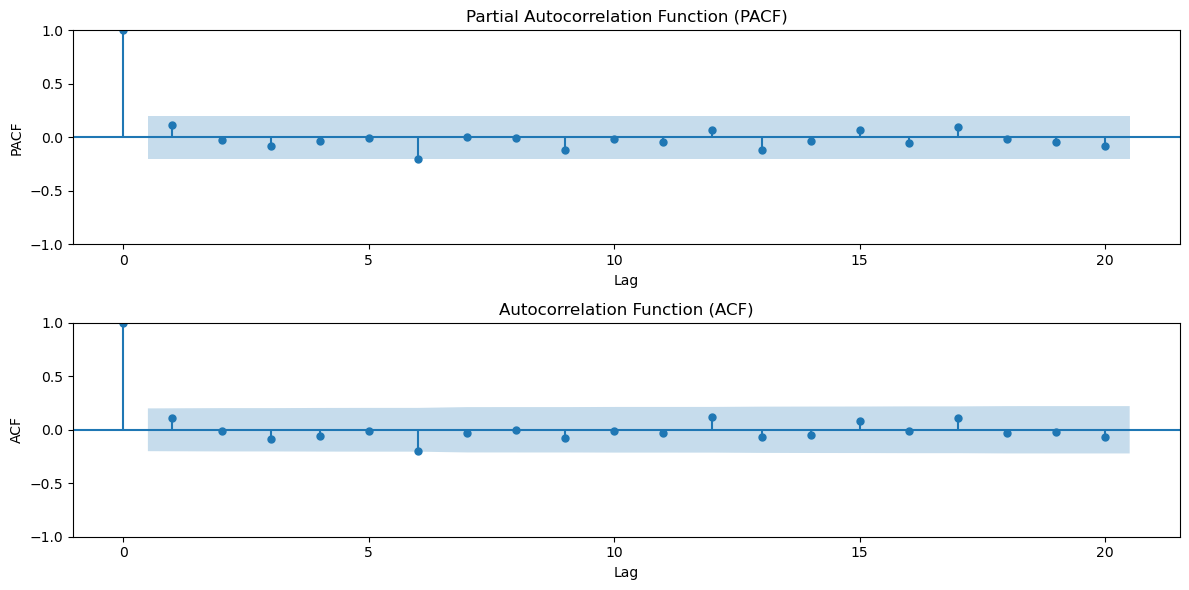

In [18]:
# Grouping the data by month and calculate the total production volume for each month
grouped_data = df.groupby(df['Production Date'].dt.to_period('M'))['Production Volume (BBL/day)'].sum()

# Fill missing months and resample to monthly frequency
min_date = df['Production Date'].min()
max_date = df['Production Date'].max()
idx = pd.date_range(start=min_date, end=max_date, freq='M')
grouped_data = grouped_data.reindex(idx.to_period('M'), fill_value=0)

# Calculate the PACF and ACF values for the production volume
pacf_vals = pacf(grouped_data, nlags=20)
acf_vals = acf(grouped_data, nlags=20)

# Plot the PACF and ACF curves
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_pacf(grouped_data, lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')

plt.subplot(2, 1, 2)
plot_acf(grouped_data, lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')

plt.tight_layout()
plt.show()


### Based on the PACF and ACF plots, we will choose <span style="color:red">p=2 and q=2</span> for the ARIMA model.

## Forecasting Production Volume with Year
We will forecast the production volume for future years using the ARIMA model.

In [7]:
# Grouping the data by year and calculating the total production volume for each year
grouped_data = df.groupby(df['Production Date'].dt.year)['Production Volume (BBL/day)'].sum()

In [8]:
# Convert the index to datetime if it's not already in datetime format
grouped_data.index = pd.to_datetime(grouped_data.index, format='%Y')

In [9]:
# Fitting an ARIMA model to the aggregated production volume data for year
model = ARIMA(grouped_data, order=(2, 3, 2))
model_fit = model.fit()

In [10]:
# Generating forecasts for future years
forecast_years = pd.date_range(start=grouped_data.index[-2], periods=5, freq='A')
forecast = model_fit.forecast(steps=len(forecast_years))

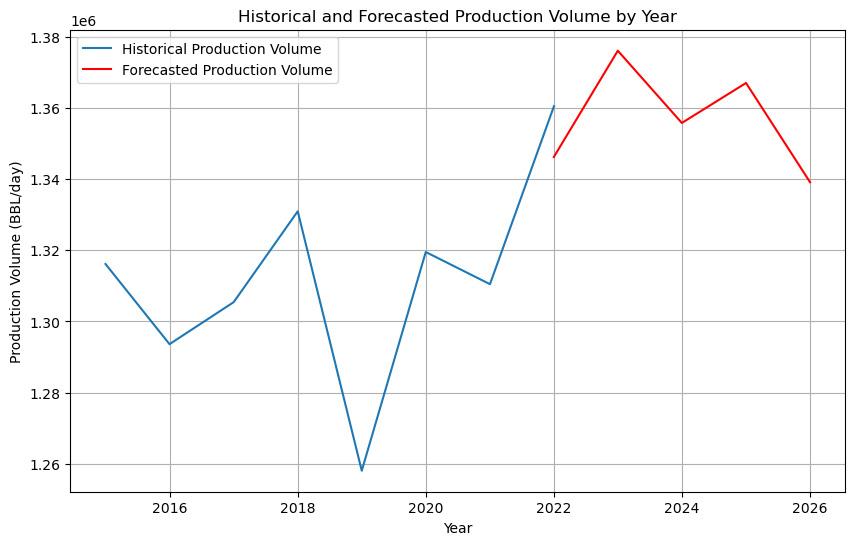

In [11]:
# Visualizing the historical and forecasted production trends by year
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, label='Historical Production Volume')
plt.plot(forecast_years, forecast, label='Forecasted Production Volume', color='red')
plt.xlabel('Year')
plt.ylabel('Production Volume (BBL/day)')
plt.title('Historical and Forecasted Production Volume by Year')
plt.legend()
plt.grid(True)
plt.show()

## Forecasting Production Volume with Month
We will also forecast the production volume for future months using the ARIMA model.

In [12]:
# Grouping the data by month and calculating the total production volume for each month
grouped_data = df.groupby(df['Production Date'].dt.to_period('M'))['Production Volume (BBL/day)'].sum()

In [13]:
# Fill missing months and resample to monthly frequency
min_date = df['Production Date'].min()
max_date = df['Production Date'].max()
idx = pd.date_range(start=min_date, end=max_date, freq='M')
grouped_data = grouped_data.reindex(idx.to_period('M'), fill_value=0)

In [14]:
# Fitting an ARIMA model to the aggregated production volume data for month
model = ARIMA(grouped_data, order=(4, 2, 4))  # You can try different orders here
model_fit = model.fit()

In [15]:
# Generating forecasts for future months
forecast_periods = 12
forecast_periods_freq = 'M'
forecast_idx = pd.date_range(start=max_date + pd.DateOffset(months=1), periods=forecast_periods, freq=forecast_periods_freq)
forecast = model_fit.forecast(steps=len(forecast_idx))

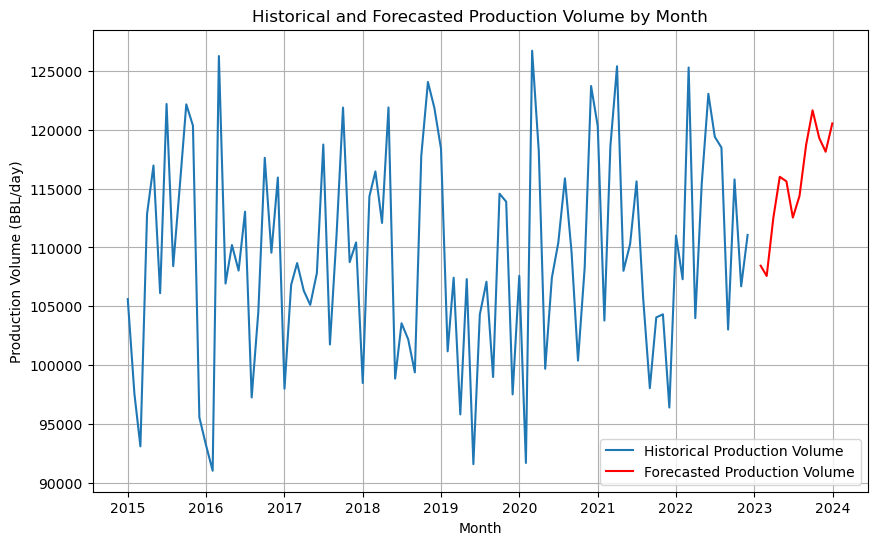

In [16]:
# Visualizing the historical and forecasted production trends by month
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index.to_timestamp(), grouped_data.values, label='Historical Production Volume')
plt.plot(forecast_idx, forecast, label='Forecasted Production Volume', color='red')
plt.xlabel('Month')
plt.ylabel('Production Volume (BBL/day)')
plt.title('Historical and Forecasted Production Volume by Month')
plt.legend()
plt.grid(True)
plt.show()